# Data Analysis and Experiments
## Read in data

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

In [59]:
df = pd.read_csv('choice_100.csv')
#df['Choice_1'].value_counts()
df.head()

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_91,Choice_92,Choice_93,Choice_94,Choice_95,Choice_96,Choice_97,Choice_98,Choice_99,Choice_100
Subj_1,1,1,2,4,3,2,1,2,4,2,...,1,1,1,2,2,2,4,2,4,2
Subj_2,2,1,4,4,3,2,3,2,1,2,...,4,2,3,4,2,4,4,2,2,4
Subj_3,4,2,3,1,4,2,4,4,4,3,...,3,2,1,4,2,2,2,4,2,2
Subj_4,4,3,4,2,1,4,3,2,2,2,...,4,2,3,4,3,4,1,4,3,4
Subj_5,1,2,2,2,2,3,4,1,4,1,...,2,2,2,2,3,3,3,3,4,4


# Check most common selection choices for 95, 100 and 150 Trials

In [60]:
most_common100 = df.mode()
most_common100

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_91,Choice_92,Choice_93,Choice_94,Choice_95,Choice_96,Choice_97,Choice_98,Choice_99,Choice_100
0,1,2,1,2,2,2,2,2,2,2,...,4,4,4,4,3,4,4,4,4,2


In [220]:
df95 = pd.read_csv('choice_95.csv')
#df['Choice_1'].value_counts()
most_common95 = df95.mode().dropna()
most_common95 = most_common95.astype('int64')
most_common95

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_86,Choice_87,Choice_88,Choice_89,Choice_90,Choice_91,Choice_92,Choice_93,Choice_94,Choice_95
0,1,2,3,2,2,2,2,2,2,2,...,4,2,4,4,4,4,4,4,4,4


In [68]:
df150 = pd.read_csv('choice_150.csv')
most_common150 = df150.mode()
most_common150 = most_common150.dropna()
most_common150 = most_common150.astype('int64')
most_common150

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_141,Choice_142,Choice_143,Choice_144,Choice_145,Choice_146,Choice_147,Choice_148,Choice_149,Choice_150
0,4,4,1,4,4,2,2,2,2,2,...,2,3,3,3,3,3,3,3,3,3


In [88]:
df3 = pd.read_csv('wi_150.csv')
df3.head()
#total_win_150 = df3.sum(axis=1)
#total_win_150.sort_values()
#total_win_150.head()

,Wins_1,Wins_2,Wins_3,Wins_4,Wins_5,Wins_6,Wins_7,Wins_8,Wins_9,Wins_10,...,Wins_141,Wins_142,Wins_143,Wins_144,Wins_145,Wins_146,Wins_147,Wins_148,Wins_149,Wins_150
Subj_1,50,100,100,100,50,100,50,100,50,50,...,50,100,50,100,50,100,50,100,50,100
Subj_2,100,100,50,50,50,100,50,100,100,100,...,100,100,100,100,100,50,100,50,50,100
Subj_3,100,50,100,50,100,100,50,50,100,50,...,50,50,50,50,50,50,50,50,50,50
Subj_4,50,50,50,50,100,50,50,50,50,100,...,50,50,50,50,50,50,50,50,50,50
Subj_5,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


In [61]:
index95 = pd.read_csv('index_95.csv')
index95.head()

,Subj,Study
0,1,Fridberg
1,2,Fridberg
2,3,Fridberg
3,4,Fridberg
4,5,Fridberg


In [62]:
index100 = pd.read_csv('index_100.csv')
index100.head()

,Subj,Study
0,1,Horstmann
1,2,Horstmann
2,3,Horstmann
3,4,Horstmann
4,5,Horstmann


In [63]:
index150 = pd.read_csv('index_150.csv')
index150.head()

,Subj,Study
0,1,Steingroever2011
1,2,Steingroever2011
2,3,Steingroever2011
3,4,Steingroever2011
4,5,Steingroever2011


# Initial data exploration - How many per study made profit?

Here we check the study that used 95 trials of the experiment and see how many of the 15 subjects made profit.

In [290]:
win95 = pd.read_csv('wi_95.csv')
loss95 = pd.read_csv('lo_95.csv')
totalloss95 = loss95.sum(axis=1)
totalloss95.head()

Subj_1   -4650
Subj_2   -7925
Subj_3   -7850
Subj_4   -7525
Subj_5   -6350
dtype: int64

In [103]:
totalwin95 = win95.sum(axis=1)
totalwin95.head()

Subj_1    5800
Subj_2    7250
Subj_3    7100
Subj_4    7000
Subj_5    6450
dtype: int64

In [166]:
margin95 = totalwin95 + totalloss95
margin95.head()

Subj_1    1150
Subj_2    -675
Subj_3    -750
Subj_4    -525
Subj_5     100
dtype: int64

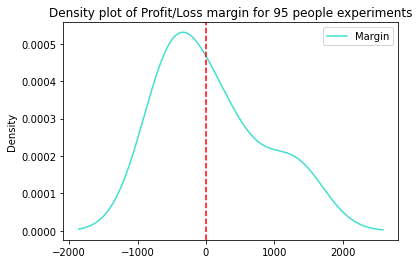

In [230]:
columns = ['Margin']

# Passing a dictionary
# key: column name
# value: series of values
margin95df = pd.DataFrame(margin95, columns=columns)
margin95df
ax1 = margin95df.plot.kde(title='Density plot of Profit/Loss margin for 95 people experiments', color='turquoise')
ax1.axvline(x=0, linestyle='--', color='red')

In [140]:
sum(margin95df.select_dtypes(np.number).gt(0).sum(axis=1))

7

Under half (7/15) of the participants made profit in the 95 trial experiment. We now do the same for both the 100 trial and 150 trial experiments

In [142]:
win100 = pd.read_csv('wi_100.csv')
loss100 = pd.read_csv('lo_100.csv')
totalloss100 = loss100.sum(axis=1)
totalloss100.head()

Subj_1   -9950
Subj_2   -8250
Subj_3   -8600
Subj_4   -5650
Subj_5   -8600
dtype: int64

In [143]:
totalwin100 = win100.sum(axis=1)
totalwin100.head()

Subj_1    8150
Subj_2    7450
Subj_3    8150
Subj_4    6850
Subj_5    7300
dtype: int64

In [144]:
margin100 = totalwin100 + totalloss100
margin100.head()

Subj_1   -1800
Subj_2    -800
Subj_3    -450
Subj_4    1200
Subj_5   -1300
dtype: int64

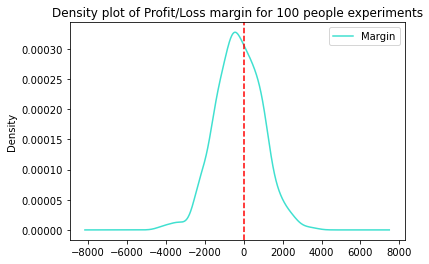

In [229]:
columns = ['Margin']

margin100df = pd.DataFrame(margin100, columns=columns)
margin100df
ax2 = margin100df.plot.kde(title='Density plot of Profit/Loss margin for 100 people experiments', color='turquoise')
ax2.axvline(x=0, linestyle='--', color='red')

In [146]:
sum(margin100df.select_dtypes(np.number).gt(0).sum(axis=1))

208

Only 41% of participants in the 100 trial experiment made money!

In [147]:
win150 = pd.read_csv('wi_150.csv')
loss150 = pd.read_csv('lo_150.csv')
totalloss150 = loss150.sum(axis=1)
totalloss150.head()

Subj_1   -12200
Subj_2   -13950
Subj_3    -9300
Subj_4    -6750
Subj_5    -6300
dtype: int64

In [148]:
totalwin150 = win150.sum(axis=1)
totalwin150.head()

Subj_1    11650
Subj_2    12350
Subj_3    10200
Subj_4     8950
Subj_5     8200
dtype: int64

In [149]:
margin150 = totalwin150 + totalloss150
margin150.head()

Subj_1    -550
Subj_2   -1600
Subj_3     900
Subj_4    2200
Subj_5    1900
dtype: int64

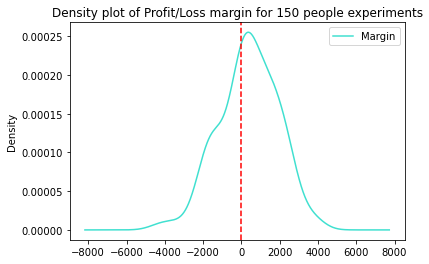

In [228]:
columns = ['Margin']

margin150df = pd.DataFrame(margin150, columns=columns)
margin150df
ax = margin150df.plot.kde(title='Density plot of Profit/Loss margin for 150 people experiments', color='turquoise')
ax.axvline(x=0, linestyle='--', color='red')

In [152]:
sum(margin150df.select_dtypes(np.number).gt(0).sum(axis=1))

62

There is a much higher % of people making profit in the 150 trial experiment (63%). There is far less people taking part in this experiment than the 100 trial experiment but it may be worth drilling down further into the data to check the differences between the different groups undertaking the experiments here. It might be interesting to see if there is any trends surrounding the age profiles surveyed. We will now try to combine the study groups with our "margin" results.

### Adding in Study undertakers to participant data

In [167]:
margin95df

,Margin
Subj_1,1150
Subj_2,-675
Subj_3,-750
Subj_4,-525
Subj_5,100
Subj_6,1250
Subj_7,-150
Subj_8,150
Subj_9,-575
Subj_10,1475


In [264]:
margin95df['Study'] = index95['Study'].values

In [171]:
margin95df

,Margin,Study
Subj_1,1150,Fridberg
Subj_2,-675,Fridberg
Subj_3,-750,Fridberg
Subj_4,-525,Fridberg
Subj_5,100,Fridberg
Subj_6,1250,Fridberg
Subj_7,-150,Fridberg
Subj_8,150,Fridberg
Subj_9,-575,Fridberg
Subj_10,1475,Fridberg


In [236]:
margin150df['Study'] = index150['Study'].values

In [237]:
margin150df.head()

,Margin,Study
Subj_1,-550,Steingroever2011
Subj_2,-1600,Steingroever2011
Subj_3,900,Steingroever2011
Subj_4,2200,Steingroever2011
Subj_5,1900,Steingroever2011


In [245]:
margin100df['Study'] = index100['Study'].values

In [246]:
margin100df.tail()

,Margin,Study
Subj_500,75,Worthy
Subj_501,600,Worthy
Subj_502,-1525,Worthy
Subj_503,-750,Worthy
Subj_504,175,Worthy


Here we will investigate the Study groups in the 150 person experiment. We will try to see does one group achieve better results in the task than the other.

In [238]:
margin150df['Study'].value_counts()

Steingroever2011    57
Wetzels             41
Name: Study, dtype: int64

In [267]:
print("Profit for the 150 trial Wetzels study")
margin150df.loc[margin150df['Study'] == 'Wetzels', 'Margin'].sum()

Profit for the 150 trial Wetzels study


24000

In [268]:
print("Profit for the 150 trial Steingroever2011 study")
margin150df.loc[margin150df['Study'] == 'Steingroever2011', 'Margin'].sum()

Profit for the 150 trial Steingroever2011 study


12550

### Assessment of 150 margin results for each study
This is interesting to note these values. Both studies make a large cumulative profit over the course of the 150 trials undertaken. There is a net profit between the two studies of 36,550 dollars, almost an average profit of 375 dollars per participant. It is interesting to note that the 41 students in "Wetzels" study were exclusively students, while in Steingroever2011's study there was a young average age (19.9) but no specific mention of if the participants were students or not. Although they made money it was almost half of the other group studied. We will measure this against the other datasets to see if age is a factor between the decision making of the groups.

In [248]:
margin100df['Study'].value_counts()

Horstmann            162
Wood                 153
SteingroverInPrep     70
Maia                  40
Worthy                35
Premkumar             25
Kjome                 19
Name: Study, dtype: int64

In [256]:
print("Loss for the 100 trial Horstmann study")
margin100df.loc[margin100df['Study'] == 'Horstmann', 'Margin'].sum()

Loss for the 100 trial Horstmann study


-6200

In [257]:
print("Loss for the 100 trial Wood study")
margin100df.loc[margin100df['Study'] == 'Wood', 'Margin'].sum()

Loss for the 100 trial Wood study


-119410

In [258]:
print("Loss for the 100 trial SteingroverInPrep study")
margin100df.loc[margin100df['Study'] == 'SteingroverInPrep', 'Margin'].sum()

Loss for the 100 trial SteingroverInPrep study


-4700

In [262]:
print("Profit for the 100 trial Maia study")
margin100df.loc[margin100df['Study'] == 'Maia', 'Margin'].sum()

Profit for the 100 trial Maia study


13600

In [261]:
print("Loss for the 100 trial Worthy study")
margin100df.loc[margin100df['Study'] == 'Worthy', 'Margin'].sum()

Loss for the 100 trial Worthy study


-15100

In [260]:
print("Profit for the 100 trial Premkumar study")
margin100df.loc[margin100df['Study'] == 'Premkumar', 'Margin'].sum()

Profit for the 100 trial Premkumar study


5995

In [259]:
print("Loss for the 100 trial Kjome study")
margin100df.loc[margin100df['Study'] == 'Kjome', 'Margin'].sum()

Loss for the 100 trial Kjome study


-8750

### Assessment of margin for 100 trial experiments
The results here are in stark contrast to the 150 trial experiments. Despite less trials there is some significant losses accumalated by participants. Although the study conducted by Wood has a large number of participants in 153, the loss of 119,410 is certainly a major outlier. This equates to an average loss of roughly 780 dollars per person. It is particularly interesting to note [here](https://openpsychologydata.metajnl.com/articles/10.5334/jopd.ak/) in table 1, we see this group has the oldest average age of any group in the study by some distance. The next oldest average age specified actually makes a profit (Premkumar). Again we see students with strong results in the Maia study as undergraduate students here make a strong profit, similar to the groups in the 150 trial experiments. We now check the 95 trial study as our last part of our margin analysis. 

In [265]:
margin95df.head()

,Margin,Study
Subj_1,1150,Fridberg
Subj_2,-675,Fridberg
Subj_3,-750,Fridberg
Subj_4,-525,Fridberg
Subj_5,100,Fridberg


In [269]:
print("Profit for the 95 trial Fridberg study")
margin95df.loc[margin95df['Study'] == 'Fridberg', 'Margin'].sum()

Profit for the 95 trial Fridberg study


1250

### Assessment of margin for the 95 trial study
In this trial as mentioned previously less than half of the participants made profit, but the 15 participant group made 1,250 over the course of the task. This obviously points to some bigger wins mitigating a collection of smaller losses in the group. The group who took part in this study were slightly older than some of the groups who made bigger profits (mean age of 29.6 years old). One thing consistent through this analysis of profit/loss margins has been student groups making more money than older groups. Age appears to be a factor but it may be interesting to look at the flow of each study too. By this, we mean looking at how participants profit/loss fluctuated on each turn and see did a series of wins lead them to change strategy and go for broke for example? Or did a series of losses at the start of the game potentially set the tone for some participants? To do this we will need to combine win and loss dataframes together and graph our results accordingly.

## Analysis of participants selection flow

We will start by looking at the participants in the 95 trial experiment.

In [271]:
win95.head()

,Wins_1,Wins_2,Wins_3,Wins_4,Wins_5,Wins_6,Wins_7,Wins_8,Wins_9,Wins_10,...,Wins_86,Wins_87,Wins_88,Wins_89,Wins_90,Wins_91,Wins_92,Wins_93,Wins_94,Wins_95
Subj_1,100,100,100,100,100,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50
Subj_2,100,100,50,100,100,100,100,100,100,100,...,50,100,100,100,100,100,50,50,50,50
Subj_3,50,50,50,100,100,100,100,100,100,100,...,100,100,100,50,50,50,50,50,50,50
Subj_4,50,50,100,100,100,100,100,50,100,100,...,100,50,50,50,50,50,50,50,50,50
Subj_5,100,100,50,50,50,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50


In [272]:
loss95.head()

,Losses_1,Losses_2,Losses_3,Losses_4,Losses_5,Losses_6,Losses_7,Losses_8,Losses_9,Losses_10,...,Losses_86,Losses_87,Losses_88,Losses_89,Losses_90,Losses_91,Losses_92,Losses_93,Losses_94,Losses_95
Subj_1,0,0,0,0,0,0,0,0,-1250,0,...,0,0,0,0,0,0,0,-250,0,0
Subj_2,0,0,0,0,0,0,0,0,0,0,...,-50,-300,0,-350,0,0,0,0,0,-25
Subj_3,0,0,0,0,0,0,0,-150,0,0,...,0,0,0,0,0,0,-250,0,0,0
Subj_4,0,0,0,0,-150,0,0,0,0,0,...,0,-50,0,-50,-50,0,-25,0,0,0
Subj_5,0,0,0,0,0,0,-150,0,0,0,...,-75,0,0,0,0,0,0,0,0,0


To merge our dataframes together we will need to change the column names so that they share common names.

In [299]:
columnnames95 = [f'Trial{num}' for num in range(1,96)]
#columnnames95
wins95test = win95
#wins95test.head()
wins95test = wins95test.set_axis(columnnames95, axis=1)

In [300]:
wins95test.head()

,Trial1,Trial2,Trial3,Trial4,Trial5,Trial6,Trial7,Trial8,Trial9,Trial10,...,Trial86,Trial87,Trial88,Trial89,Trial90,Trial91,Trial92,Trial93,Trial94,Trial95
Subj_1,100,100,100,100,100,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50
Subj_2,100,100,50,100,100,100,100,100,100,100,...,50,100,100,100,100,100,50,50,50,50
Subj_3,50,50,50,100,100,100,100,100,100,100,...,100,100,100,50,50,50,50,50,50,50
Subj_4,50,50,100,100,100,100,100,50,100,100,...,100,50,50,50,50,50,50,50,50,50
Subj_5,100,100,50,50,50,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50


In [301]:
loss95test = loss95
#wins95test.head()
loss95test = loss95test.set_axis(columnnames95, axis=1)
loss95test.head()

,Trial1,Trial2,Trial3,Trial4,Trial5,Trial6,Trial7,Trial8,Trial9,Trial10,...,Trial86,Trial87,Trial88,Trial89,Trial90,Trial91,Trial92,Trial93,Trial94,Trial95
Subj_1,0,0,0,0,0,0,0,0,-1250,0,...,0,0,0,0,0,0,0,-250,0,0
Subj_2,0,0,0,0,0,0,0,0,0,0,...,-50,-300,0,-350,0,0,0,0,0,-25
Subj_3,0,0,0,0,0,0,0,-150,0,0,...,0,0,0,0,0,0,-250,0,0,0
Subj_4,0,0,0,0,-150,0,0,0,0,0,...,0,-50,0,-50,-50,0,-25,0,0,0
Subj_5,0,0,0,0,0,0,-150,0,0,0,...,-75,0,0,0,0,0,0,0,0,0


In [303]:
df95_added = wins95test.add(loss95test, fill_value=0)
df95_added

,Trial1,Trial2,Trial3,Trial4,Trial5,Trial6,Trial7,Trial8,Trial9,Trial10,...,Trial86,Trial87,Trial88,Trial89,Trial90,Trial91,Trial92,Trial93,Trial94,Trial95
Subj_1,100,100,100,100,100,100,100,100,-1150,100,...,50,50,50,50,50,50,50,-200,50,50
Subj_2,100,100,50,100,100,100,100,100,100,100,...,0,-200,100,-250,100,100,50,50,50,25
Subj_3,50,50,50,100,100,100,100,-50,100,100,...,100,100,100,50,50,50,-200,50,50,50
Subj_4,50,50,100,100,-50,100,100,50,100,100,...,100,0,50,0,0,50,25,50,50,50
Subj_5,100,100,50,50,50,100,-50,100,100,100,...,-25,50,50,50,50,50,50,50,50,50
Subj_6,100,100,100,100,-50,100,100,50,50,50,...,50,50,50,0,50,50,50,50,-200,50
Subj_7,100,100,50,50,50,50,100,100,100,-50,...,50,50,-50,100,50,50,-200,50,100,50
Subj_8,50,100,100,50,100,50,100,100,-50,100,...,50,100,0,50,100,50,50,50,50,50
Subj_9,100,100,100,100,50,50,-50,50,50,50,...,50,100,50,100,-1150,50,100,50,25,100
Subj_10,50,100,100,100,50,100,100,50,50,50,...,50,50,50,50,50,50,50,50,-200,25


This study was all part of the Fridberg study so we don't need to worry about comparing other studies here.

In [304]:
per_trial_95 = df95_added.sum(axis=0)
per_trial_95

Trial1     1200
Trial2     1300
Trial3     1000
Trial4     1150
Trial5      850
           ... 
Trial91     950
Trial92     375
Trial93     575
Trial94     375
Trial95     575
Length: 95, dtype: int64

In [305]:
column_per_trial = ['Net money per trial']

per_trial95_df = pd.DataFrame(per_trial_95, columns=column_per_trial)
per_trial95_df

,Net money per trial
Trial1,1200
Trial2,1300
Trial3,1000
Trial4,1150
Trial5,850
...,...
Trial91,950
Trial92,375
Trial93,575
Trial94,375
